<font color="Yellow" Size="6">DECISION TREE </font>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, classification_report

In [3]:
# Load the Wine dataset
wine = load_wine()
X, y = wine.data, wine.target

In [4]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

<font color="Yellow" size="6">You can fine-tune the model by adjusting hyperparameters like:</font>
<p><b>criterion: 'gini' (default) or 'entropy'.</b></p>
<p><b>max_depth: Controls the depth of the tree to prevent overfitting.</b></p>
<p><b>min_samples_split and min_samples_leaf: Control how splits occur.</b></p>

In [5]:
# Train a Decision Tree Classifier
tree_clf = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [6]:
# Predict on the test set
y_pred = tree_clf.predict(X_test)

In [7]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

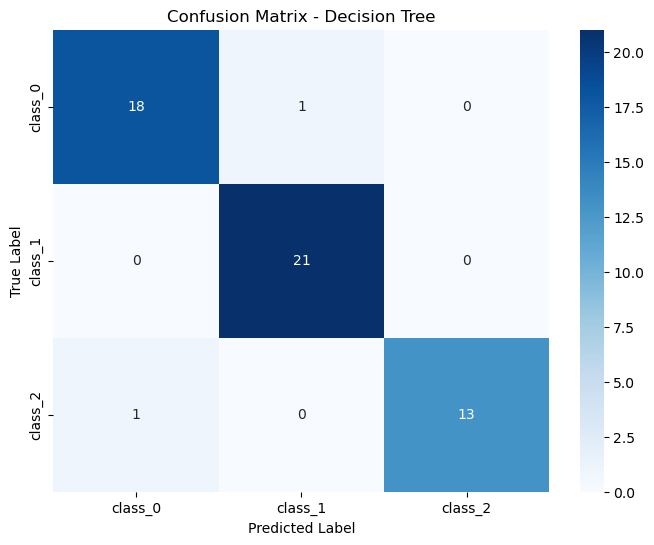

In [8]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=wine.target_names, yticklabels=wine.target_names)
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


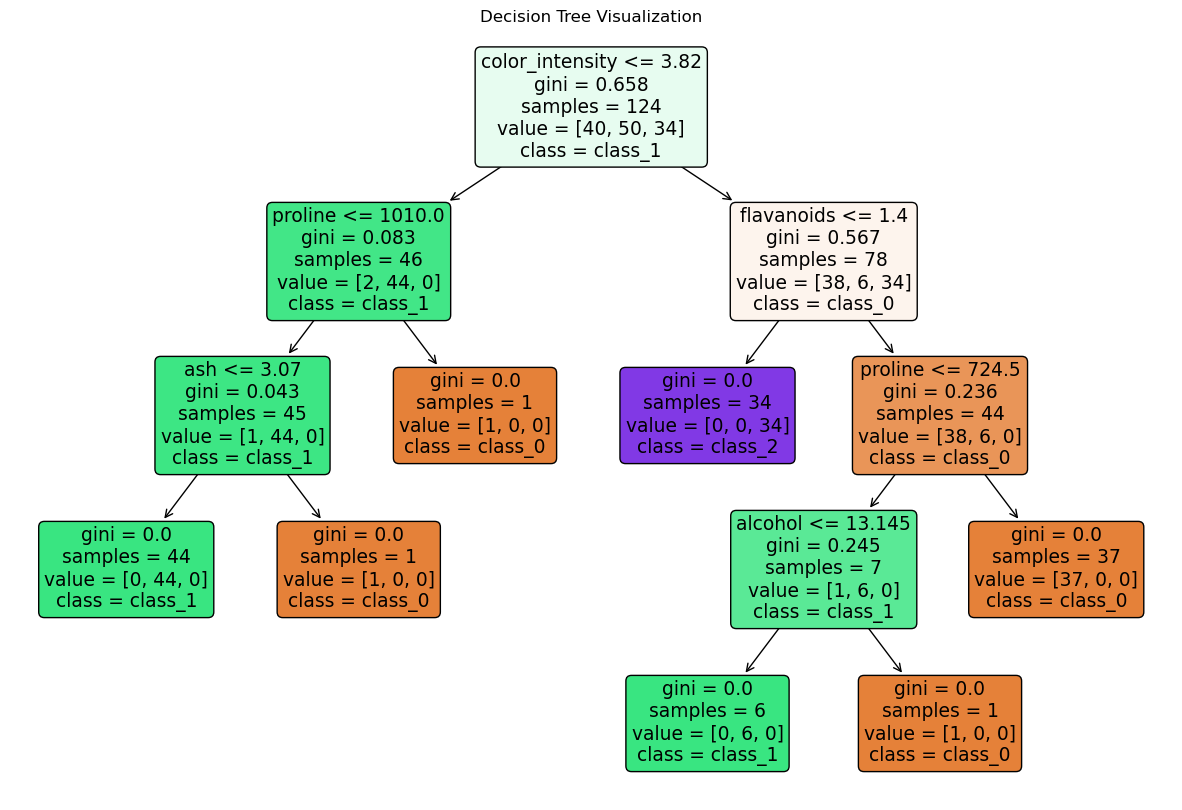

In [9]:
# Visualize the Decision Tree
plt.figure(figsize=(15, 10))
plot_tree(tree_clf, feature_names=wine.feature_names, class_names=wine.target_names, filled=True, rounded=True)
plt.title('Decision Tree Visualization')
plt.show()

In [11]:
feature_names=wine.feature_names
feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [9]:
# Predict for a new instance
new_instance = [[13.5, 1.2, 2.7, 15.0, 98.0, 2.3, 2.0, 0.3, 1.5, 5.5, 1.04, 3.0, 800]]  # Example features
predicted_class = tree_clf.predict(new_instance)

In [11]:
print("Predicted Class:", predicted_class)

Predicted Class: [0]


In [12]:
# Display classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=wine.target_names))


Classification Report:
               precision    recall  f1-score   support

     class_0       0.95      0.95      0.95        19
     class_1       0.95      1.00      0.98        21
     class_2       1.00      0.93      0.96        14

    accuracy                           0.96        54
   macro avg       0.97      0.96      0.96        54
weighted avg       0.96      0.96      0.96        54



In [13]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9629629629629629


<font color="yellow" size="6"><b>1.Hyper Performance Tuning</font>

In [15]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Create a GridSearchCV object
grid_search = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,  # 5-fold cross-validation
    verbose=1,
    n_jobs=-1  # Use all available CPUs
)

# Perform grid search
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)


Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Parameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Cross-Validation Accuracy: 0.9353333333333333


<font color="yellow" size="6"><b>2. Feature Importance</b></font>

Feature Importances:
flavanoids: 0.4147
color_intensity: 0.4115
proline: 0.1289
ash: 0.0240
alcohol: 0.0210
od280/od315_of_diluted_wines: 0.0000
hue: 0.0000
proanthocyanins: 0.0000
nonflavanoid_phenols: 0.0000
total_phenols: 0.0000
magnesium: 0.0000
alcalinity_of_ash: 0.0000
malic_acid: 0.0000


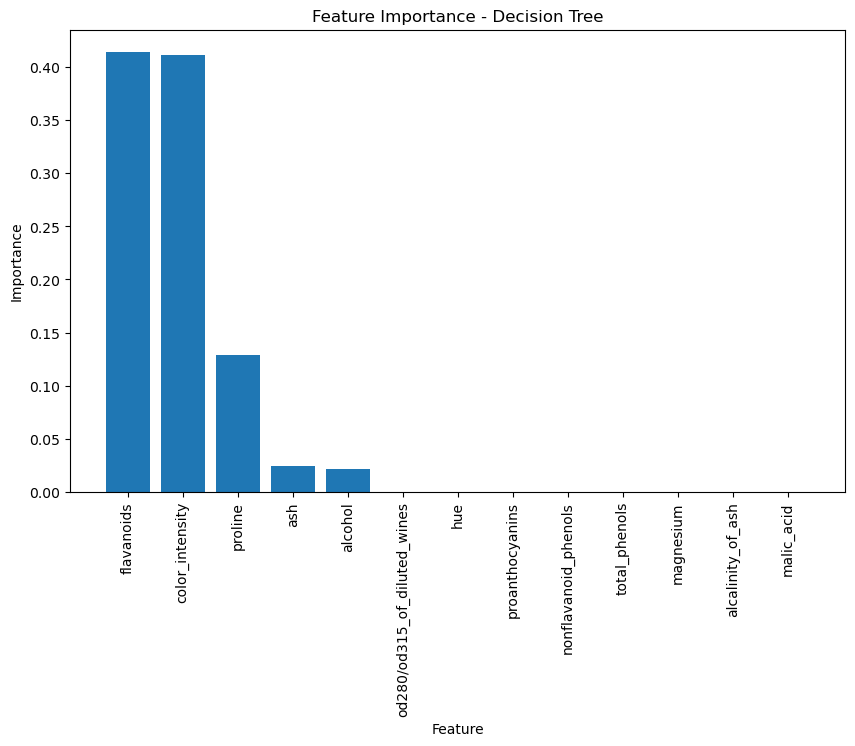

In [16]:
# Get feature importances
importances = tree_clf.feature_importances_

# Sort features by importance
sorted_indices = np.argsort(importances)[::-1]

# Display feature importance
print("Feature Importances:")
for i in sorted_indices:
    print(f"{wine.feature_names[i]}: {importances[i]:.4f}")

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.bar(range(len(importances)), importances[sorted_indices], align='center')
plt.xticks(range(len(importances)), [wine.feature_names[i] for i in sorted_indices], rotation=90)
plt.title('Feature Importance - Decision Tree')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()


<font color="yellow" size="6"><b>3. Tree Pruning</b></font>
<p>Tree pruning helps avoid overfitting by restricting the complexity of the tree.
Post-Pruning with ccp_alpha</p>
<p>Scikit-learn offers Cost Complexity Pruning to prune trees based on the ccp_alpha parameter.</p>

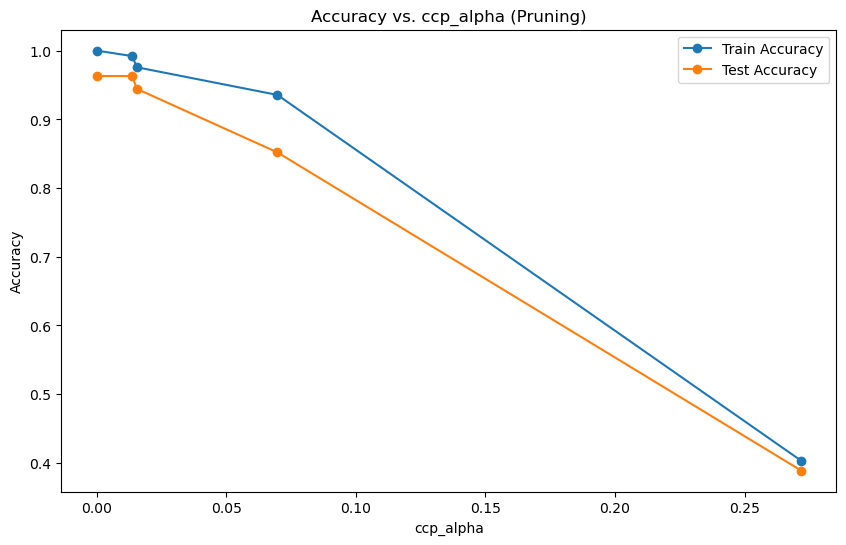

In [17]:
# Find the optimal ccp_alpha for pruning
path = tree_clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas

# Train multiple trees for different values of ccp_alpha
trees = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    trees.append(clf)

# Evaluate trees and plot accuracy vs. ccp_alpha
train_scores = [tree.score(X_train, y_train) for tree in trees]
test_scores = [tree.score(X_test, y_test) for tree in trees]

plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, train_scores, marker='o', label='Train Accuracy')
plt.plot(ccp_alphas, test_scores, marker='o', label='Test Accuracy')
plt.xlabel('ccp_alpha')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. ccp_alpha (Pruning)')
plt.legend()
plt.show()
